Import libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [14]:
data = np.loadtxt('faces.dat')
print(data.shape)


(400, 4096)


3.a) Display the 200th image

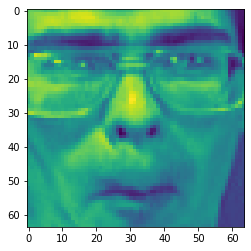

In [15]:
img = data[199,:].reshape(64,64).T
plt.imshow(img)
plt.show()

3. b) Remove the mean of the images, and then display the 100th image.

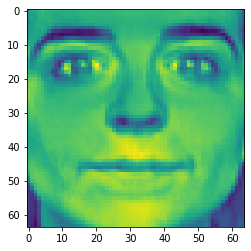

In [16]:
# Get mean of each variable
mean_vars = data.mean(axis=0)

# Create new numpy array that will store the mean centered version of our data
data_mean_centered = data

# Get number of rows and columns
num_rows = data_mean_centered.shape[0]
num_vars = data_mean_centered.shape[1]

# For each row in our data, subtract each column by its mean
for i in range(num_rows): # iterate down each row
  for j in range(num_vars): # iterate across each column
    data_mean_centered[i][j] -= mean_vars[j] #subtract value in j-th column by the mean of j-th column

# Get the flattened matrix of the hundredth image and reshape into 64x64 matrix
image_hundred = data_mean_centered[99,:].reshape(64,64).T
plt.imshow(image_hundred)
plt.show()



3. c) Perform PCA on the mean-centered data matrix. You can either implement PCA by yourself using eigenvalue decomposition over the sample covariance matrix, or use a existing machine learning toolbox. Sort the eigenvalues in a descending order and plot them.

Text(0.5, 1.0, 'Descending Order Eigenvalues')

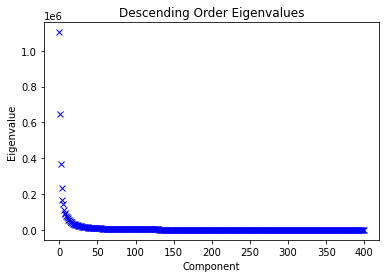

In [55]:
from sklearn.decomposition import PCA

pca = PCA(400)
pca.fit(data_mean_centered)
eig_val = np.sort(pca.explained_variance_)[::-1] ## reverse ascending order list to get descending order

plt.plot(eig_val, 'xb')
plt.xlabel("Component")
plt.ylabel("Eigenvalue")
plt.title("Descending Order Eigenvalues")



3.d) You will find the last (i.e., 400th) eigenvalue is 0. Explain why

In [53]:
print(np.amin(eig_val))


3.826951172668855e-24


3. e) Based on the eigenvalues, determine the dimensionality of the data you want to keep (i.e., how many principal components you want to keep), which accounts for most of the variance.
Explain your reason.

In [79]:

vars = np.sort(pca.explained_variance_ratio_)[::-1]

sumVar = 0

targetVar = 0.95

indexComp = 0
while sumVar < targetVar:
  sumVar = sumVar + vars[indexComp]
  indexComp = indexComp+1

numComp = indexComp+1

print(f"{numComp} Principal Components needed for achieving {targetVar*100}% variance")






124 Principal Components needed for achieving 95.0% variance


3. f) Display the top-5 leading eigenvectors (corresponding to the top-5 largest eigenvalues) in 5 figures.

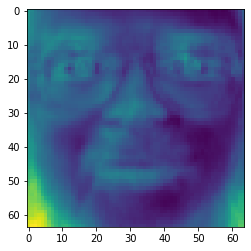

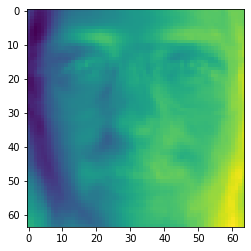

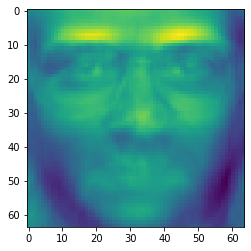

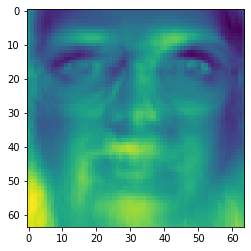

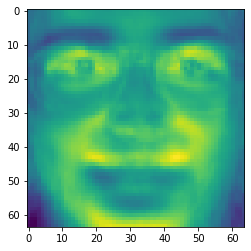

In [71]:
indices = np.argsort(pca.explained_variance_)[::-1]

comps = pca.components_[indices]
for i in range(5):
  vec = np.asarray(comps[i]).reshape(64,64).T
  plt.imshow(vec)
  plt.show()



3. g) Display, respectively, the reconstructed 100th images using 10, 100, 200, and 399 principal components. (Hint: In Lecture 9 (page 19), we have learned that ˆx = vv>x if we project x into
1-dimensional space using the 1st principal component.

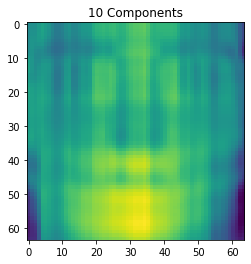

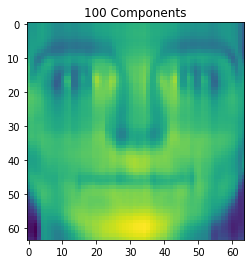

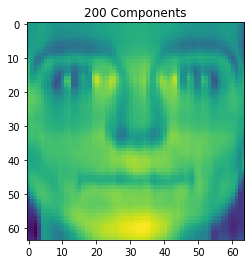

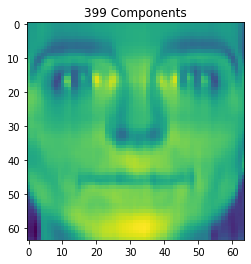

In [78]:
hundred = data[99,:].reshape(64,64).T

temp = np.zeros((64,64))

p_comp = [10,100,200,399]

for principal_component in p_comp:
  for n in range(principal_component):
    vector = np.asarray(comps[n]).reshape(64,64)
    temp+= np.dot(np.dot(vector.T, vector), hundred)
  plt.imshow(temp)
  
  plt.title(f"{principal_component} Components")
  plt.show()



